In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [ ]:
import nltk
nltk.download()

In [ ]:
data_path="/content/drive/My Drive/data/NLP/TwitterHate.csv"

In [ ]:
data=pd.read_csv(data_path)

In [ ]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


**Data Preprocessing**

In [ ]:
#classifyin the entire dataset into lists
tweets=data.tweet
label=data.label

In [ ]:
tweets.head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [ ]:
words_db=[]
ptstem=PorterStemmer()
corpus=[]
for tweet in tweets:
  text=tweet
  text=re.sub("[^a-zA-Z]"," ",text)
  text=text.lower()
  words=text.split()
  words_wt_sw=[]
  for word in words:
    if word not in stopwords.words("english"):
      words_wt_sw.append(ptstem.stem(word))
      words_db.append(word)
  text=" ".join(words_wt_sw)
  corpus.append(text)
  


In [ ]:
corpus[0]

'user father dysfunct selfish drag kid dysfunct run'

**Identifying the most occured word**

In [ ]:
words
from collections import Counter 
counter=Counter(words_db)
most_occured_word=counter.most_common(10)

In [ ]:
most_occured_word

[('user', 17577),
 ('love', 2828),
 ('day', 2393),
 ('amp', 1777),
 ('happy', 1707),
 ('u', 1194),
 ('like', 1180),
 ('life', 1176),
 ('time', 1150),
 ('today', 1095)]

In [ ]:
top_10_words=[]
for i in range(len(most_occured_word)):
  top_10_words.append(most_occured_word[i][0])

**Top 10 most frequent words**

In [ ]:
top_10_words

['user', 'love', 'day', 'amp', 'happy', 'u', 'like', 'life', 'time', 'today']

**Converting From text to Vector**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfIdf=TfidfVectorizer(max_features=5000)

In [ ]:
X=tfIdf.fit_transform(corpus).toarray()

In [ ]:
y=np.array(label)

In [ ]:
X.shape

(31962, 5000)

In [ ]:
y.shape

(31962,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

**Model building: Ordinary Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [ ]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score
def performance(y_pred,y_test):
  acc=accuracy_score(y_pred,y_test)
  
  print("Confusion_matrix is \n",confusion_matrix(y_pred,y_test))
  print("\naccuaracy      :", acc)
  print("Recall Score   :", recall_score(y_pred,y_test))
  print("f1_Score       :", f1_score(y_pred,y_test))


**Measuring the Performance**

In [ ]:
#performance of the Logistic Regression
performance(y_pred,y_test)

Confusion_matrix is 
 [[5920  306]
 [  10  157]]

accuaracy      : 0.9505709369623025
Recall Score   : 0.9401197604790419
f1_Score       : 0.49841269841269836


**We have got a accuarcy of 95 % and recall of 94% using Simple Logistic Regression but f1_score is 49.8% which is very poor.**


**Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s**

-->Lets check



In [ ]:
ones_count=0
zeros_count=0
for val in data.label:
  if(val==0):
    zeros_count+=1
  else:
    ones_count+=1
  

In [ ]:
ones_count

2242

In [ ]:
zeros_count

29720

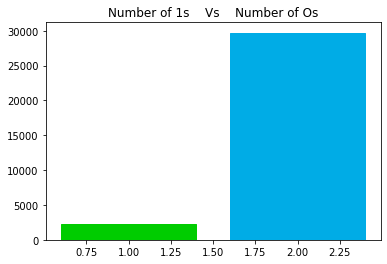

In [ ]:
barlist=plt.bar([1,2], [ones_count,zeros_count])
barlist[0].set_color('#00cc00')
barlist[1].set_color("#00ace6")
plt.title("Number of 1s    Vs    Number of Os")
plt.show()

we can clearly see the imbalace of the class data


**Random under-sampling**

In [ ]:
import imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Removed indexes: [ 7659 29192  5738 ... 31947 31948 31960]


In [ ]:
ones_count=0
zeros_count=0
for val in y_rus:
  if(val==0):
    zeros_count+=1
  else:
    ones_count+=1
  

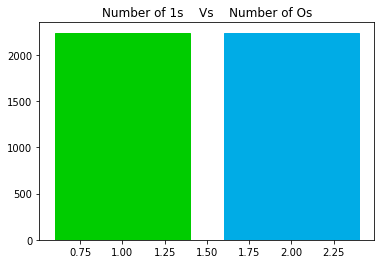

In [ ]:
barlist=plt.bar([1,2], [ones_count,zeros_count])
barlist[0].set_color('#00cc00')
barlist[1].set_color("#00ace6")
plt.title("Number of 1s    Vs    Number of Os")
plt.show()

**now we can see that the data is preety balanced between both of these classes lets re apply the algorithm**

In [ ]:
#train_test split
X_train,X_test,y_train,y_test=train_test_split(X_rus,y_rus,test_size=0.2,random_state=10)

In [ ]:
classifier=LogisticRegression()

In [ ]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
performance(y_pred,y_test)

Confusion_matrix is 
 [[408  49]
 [ 65 375]]

accuaracy      : 0.8729096989966555
Recall Score   : 0.8522727272727273
f1_Score       : 0.8680555555555557


**Now you get the perfect kind of all accuarcy performance metrics this is power of balanced data**

**Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_values = {'penalty': ['l2'],'C':[0.1,0.4,0.5,1.0]}
grid_clf_acc = GridSearchCV(classifier, param_grid = grid_values,scoring = 'recall',cv=4)

In [ ]:
grid_clf_acc.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.4, 0.5, 1.0], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [ ]:
grid_clf_acc.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [ ]:
classifier=LogisticRegression(C=1.0,penalty="l2")

In [ ]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
performance(y_pred,y_test)

Confusion_matrix is 
 [[408  49]
 [ 65 375]]

accuaracy      : 0.8729096989966555
Recall Score   : 0.8522727272727273
f1_Score       : 0.8680555555555557
